In [1]:
from stock_data_ingestion import ingest_stocks_to_df
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display 
from keras.layers import LSTM, Dense, Input
from keras import Sequential
from sklearn.model_selection import TimeSeriesSplit
from keras.optimizers import Adam, SGD
from keras.losses import MeanSquaredError
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
from keras.preprocessing.sequence import TimeseriesGenerator

## Data Preprocessing

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2015-02-27,5.780000,5.660000,5.780000,5.710000,15600.0,5.710000,GSIT
2015-03-02,5.770000,5.680000,5.700000,5.770000,8400.0,5.770000,GSIT
2015-03-03,5.800000,5.750000,5.750000,5.800000,20300.0,5.800000,GSIT
2015-03-04,5.800000,5.700000,5.780000,5.760000,24300.0,5.760000,GSIT
2015-03-05,5.850000,5.790000,5.790000,5.840000,15900.0,5.840000,GSIT
...,...,...,...,...,...,...,...
2021-02-22,182.440002,175.059998,181.000000,175.289993,2661300.0,175.289993,ARKW
2021-02-23,170.748993,156.880005,165.570007,170.160004,6246800.0,170.160004,ARKW
2021-02-24,171.776001,165.910004,169.100006,170.539993,2394900.0,170.539993,ARKW


GSIT len 1511
ICAD len 1511
XAIR len 683
LTRN len 180
ARKK len 1511
ARKF len 521
ARKW len 1511


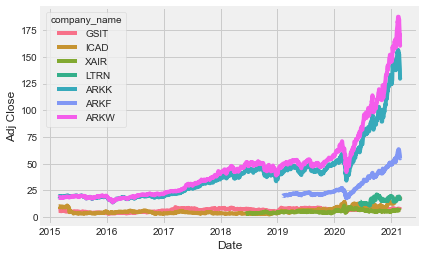

In [6]:
## comment first line out after first use to prevent 
## giving the source website for the stocks too much traffic. 
# stocks_df = ingest_stocks_to_df()
# stock_list = stocks_df.company_name.unique()
# # displays
# display(stocks_df)
# for stock in stock_list:
#     print(stock, 'len', len(stocks_df[stocks_df.company_name == stock].index))
# sns.lineplot(x=stocks_df.index, y='Adj Close',data=stocks_df, legend='auto', hue='company_name')
# plt.show()

In [7]:
def get_data_targets(stock_arr, sequence_inlength):
    """where stock_arr is sequential np.array and 
    sequence_inlength is the length of the data sequences"""
    x, y = list(), list()
    for index in range(sequence_inlength, len(stock_arr)):
        window = stock_arr[index-sequence_inlength:index]
        x.append(window)
        y.append([stock_arr[index]])
    data = np.array(x)
    targets = np.array(y)
    return data, targets
def to_ts_data(stock=stock_list[0], sequence_inlength=60):
    stock_arr = stocks_df[stocks_df.company_name == stock]['Adj Close'].to_numpy()
    data, targets = get_data_targets(stock_arr, sequence_inlength)
#     display(data, targets)
    data_gen = TimeseriesGenerator(data, targets, length=sequence_inlength)
    ##shape (number of batches, input number of steps before prediction, feature-dimensions for input)
    return data_gen

## Model Building

In [8]:
def lstm_model(nodes_lstm=50, dropout=0.0, recurrent_dropout=0.0, learning_rate=0.01, loss='mse', optimizer=Adam, metrics=['mse']):
    lstm_layer = LSTM(nodes_lstm, dropout=dropout, recurrent_dropout=recurrent_dropout)
    model = Sequential()
#     model.add(Input((1,1)))
    model.add(lstm_layer)
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=metrics)
    return model
# lstm_model().summary()

In [12]:
data_gen = to_ts_data() 
# display(data_gen, len(data_gen), data_gen[0])
model = lstm_model()
model.fit(data_gen)
# kr = KerasRegressor(build_fn=lstm_model())
# display(kr.get_params())
# kr.fit(data_gen)

11/11 [==============================] - 3s 59ms/step - loss: 12.2952 - mse: 12.2952


In [13]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                22200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 22,251
Trainable params: 22,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict()